## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0  15.239489  563.426313  0.266861  2.350557  151.264750
1   6.428697  908.425427  0.882447  1.682995  801.559008
2  14.911082  823.535927  0.356605  3.722509  294.233306
3  65.497077  755.566914  0.738558  6.801936  561.850685
4  71.315006  148.099800  0.386515  8.859522   91.364520


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9411538	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9308667	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9216755	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9118499	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8997961	total: 60.1ms	remaining: 12s
5:	learn: 0.8903051	total: 60.6ms	remaining: 10s
6:	learn: 0.8779619	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8669836	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8539435	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8406239	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8282950	total: 63ms	remaining: 5.66s
11:	learn: 0.8148863	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8052849	total: 63.9ms	remaining: 4.85s
13:	learn: 0.7943895	total: 64.3ms	remaining: 4.53s
14:	learn: 0.7853924	total: 64.7ms	remaining: 4.25s
15:	learn: 0.7773035	total: 65.2ms	remaining: 4.01s
16:	learn: 0.7670312	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7575599	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7512386	total: 66.7ms	remaining: 3.44s


115:	learn: 0.2419128	total: 107ms	remaining: 815ms
116:	learn: 0.2392795	total: 107ms	remaining: 811ms
117:	learn: 0.2370856	total: 108ms	remaining: 805ms
118:	learn: 0.2345410	total: 108ms	remaining: 800ms
119:	learn: 0.2319103	total: 108ms	remaining: 795ms
120:	learn: 0.2288475	total: 109ms	remaining: 790ms
121:	learn: 0.2268194	total: 109ms	remaining: 785ms
122:	learn: 0.2243337	total: 110ms	remaining: 782ms
123:	learn: 0.2225107	total: 110ms	remaining: 777ms
124:	learn: 0.2199443	total: 110ms	remaining: 771ms
125:	learn: 0.2176016	total: 111ms	remaining: 768ms
126:	learn: 0.2152330	total: 111ms	remaining: 765ms
127:	learn: 0.2128514	total: 112ms	remaining: 761ms
128:	learn: 0.2108304	total: 112ms	remaining: 756ms
129:	learn: 0.2093139	total: 112ms	remaining: 753ms
130:	learn: 0.2074689	total: 113ms	remaining: 750ms
131:	learn: 0.2058036	total: 113ms	remaining: 746ms
132:	learn: 0.2038092	total: 114ms	remaining: 742ms
133:	learn: 0.2016947	total: 114ms	remaining: 738ms
134:	learn: 

292:	learn: 0.0598358	total: 186ms	remaining: 448ms
293:	learn: 0.0594130	total: 186ms	remaining: 447ms
294:	learn: 0.0590299	total: 187ms	remaining: 446ms
295:	learn: 0.0587110	total: 187ms	remaining: 445ms
296:	learn: 0.0583105	total: 188ms	remaining: 444ms
297:	learn: 0.0579310	total: 188ms	remaining: 443ms
298:	learn: 0.0576282	total: 189ms	remaining: 442ms
299:	learn: 0.0572028	total: 189ms	remaining: 441ms
300:	learn: 0.0569167	total: 189ms	remaining: 439ms
301:	learn: 0.0565359	total: 190ms	remaining: 439ms
302:	learn: 0.0561240	total: 190ms	remaining: 438ms
303:	learn: 0.0558381	total: 191ms	remaining: 437ms
304:	learn: 0.0555551	total: 191ms	remaining: 436ms
305:	learn: 0.0551703	total: 192ms	remaining: 435ms
306:	learn: 0.0547761	total: 192ms	remaining: 434ms
307:	learn: 0.0544885	total: 193ms	remaining: 433ms
308:	learn: 0.0542049	total: 193ms	remaining: 431ms
309:	learn: 0.0538543	total: 193ms	remaining: 430ms
310:	learn: 0.0535944	total: 194ms	remaining: 429ms
311:	learn: 

530:	learn: 0.0190754	total: 287ms	remaining: 254ms
531:	learn: 0.0189991	total: 288ms	remaining: 253ms
532:	learn: 0.0189043	total: 288ms	remaining: 252ms
533:	learn: 0.0187887	total: 288ms	remaining: 252ms
534:	learn: 0.0186983	total: 289ms	remaining: 251ms
535:	learn: 0.0186099	total: 289ms	remaining: 250ms
536:	learn: 0.0184980	total: 290ms	remaining: 250ms
537:	learn: 0.0184226	total: 290ms	remaining: 249ms
538:	learn: 0.0183353	total: 291ms	remaining: 249ms
539:	learn: 0.0182515	total: 291ms	remaining: 248ms
540:	learn: 0.0181671	total: 292ms	remaining: 247ms
541:	learn: 0.0180919	total: 292ms	remaining: 247ms
542:	learn: 0.0180038	total: 293ms	remaining: 246ms
543:	learn: 0.0179306	total: 293ms	remaining: 246ms
544:	learn: 0.0178498	total: 293ms	remaining: 245ms
545:	learn: 0.0177638	total: 294ms	remaining: 244ms
546:	learn: 0.0176762	total: 294ms	remaining: 244ms
547:	learn: 0.0175727	total: 295ms	remaining: 243ms
548:	learn: 0.0174953	total: 295ms	remaining: 242ms
549:	learn: 

714:	learn: 0.0094044	total: 366ms	remaining: 146ms
715:	learn: 0.0093728	total: 366ms	remaining: 145ms
716:	learn: 0.0093485	total: 367ms	remaining: 145ms
717:	learn: 0.0093247	total: 367ms	remaining: 144ms
718:	learn: 0.0093064	total: 367ms	remaining: 144ms
719:	learn: 0.0092711	total: 368ms	remaining: 143ms
720:	learn: 0.0092407	total: 368ms	remaining: 142ms
721:	learn: 0.0092014	total: 369ms	remaining: 142ms
722:	learn: 0.0091800	total: 369ms	remaining: 141ms
723:	learn: 0.0091569	total: 369ms	remaining: 141ms
724:	learn: 0.0091393	total: 370ms	remaining: 140ms
725:	learn: 0.0091219	total: 370ms	remaining: 140ms
726:	learn: 0.0090878	total: 371ms	remaining: 139ms
727:	learn: 0.0090585	total: 371ms	remaining: 139ms
728:	learn: 0.0090366	total: 371ms	remaining: 138ms
729:	learn: 0.0090162	total: 372ms	remaining: 137ms
730:	learn: 0.0089658	total: 372ms	remaining: 137ms
731:	learn: 0.0089445	total: 373ms	remaining: 136ms
732:	learn: 0.0089230	total: 373ms	remaining: 136ms
733:	learn: 

959:	learn: 0.0049107	total: 469ms	remaining: 19.5ms
960:	learn: 0.0048963	total: 469ms	remaining: 19ms
961:	learn: 0.0048899	total: 470ms	remaining: 18.6ms
962:	learn: 0.0048871	total: 470ms	remaining: 18.1ms
963:	learn: 0.0048731	total: 470ms	remaining: 17.6ms
964:	learn: 0.0048574	total: 471ms	remaining: 17.1ms
965:	learn: 0.0048435	total: 471ms	remaining: 16.6ms
966:	learn: 0.0048196	total: 471ms	remaining: 16.1ms
967:	learn: 0.0048096	total: 472ms	remaining: 15.6ms
968:	learn: 0.0047961	total: 472ms	remaining: 15.1ms
969:	learn: 0.0047809	total: 473ms	remaining: 14.6ms
970:	learn: 0.0047676	total: 473ms	remaining: 14.1ms
971:	learn: 0.0047445	total: 473ms	remaining: 13.6ms
972:	learn: 0.0047348	total: 474ms	remaining: 13.1ms
973:	learn: 0.0047219	total: 474ms	remaining: 12.7ms
974:	learn: 0.0047191	total: 474ms	remaining: 12.2ms
975:	learn: 0.0046980	total: 475ms	remaining: 11.7ms
976:	learn: 0.0046853	total: 475ms	remaining: 11.2ms
977:	learn: 0.0046637	total: 476ms	remaining: 10

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

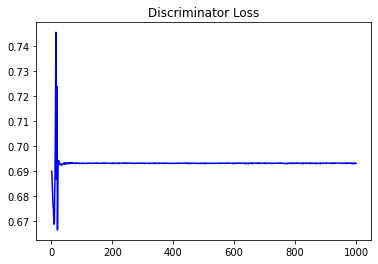

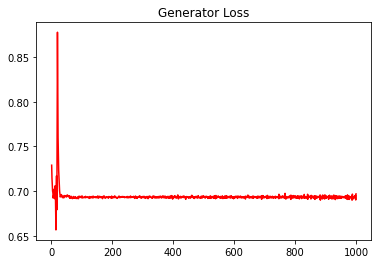

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04408942452366118


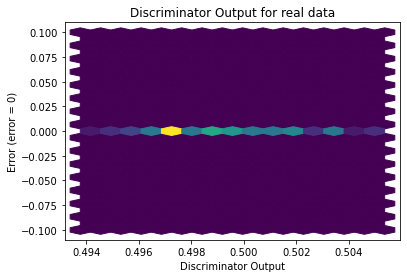

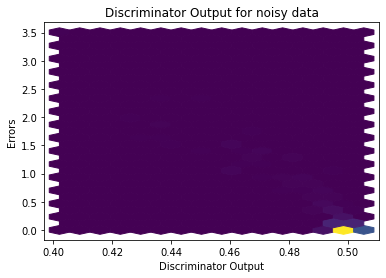

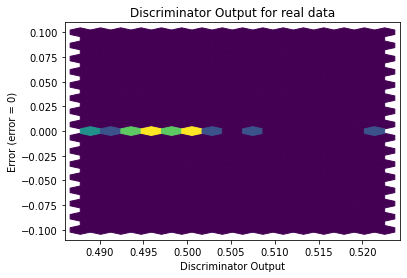

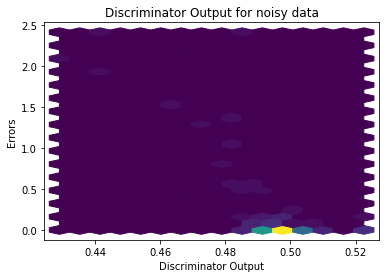

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


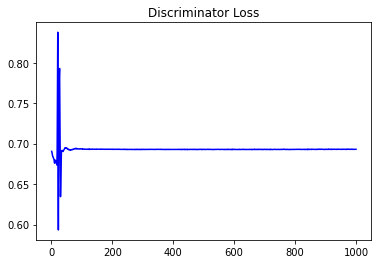

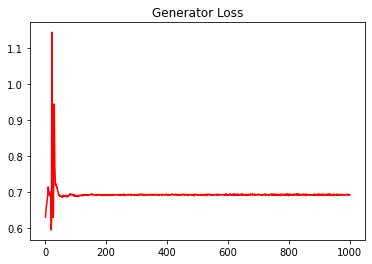

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03850006048411143


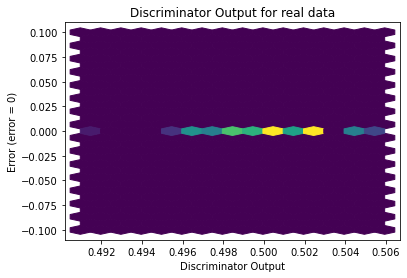

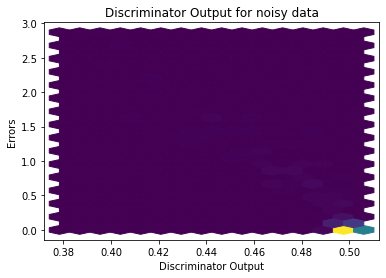

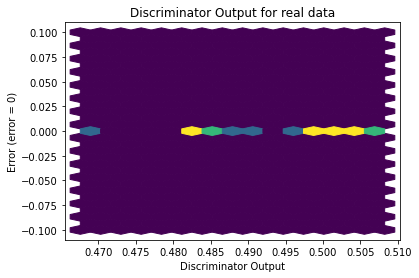

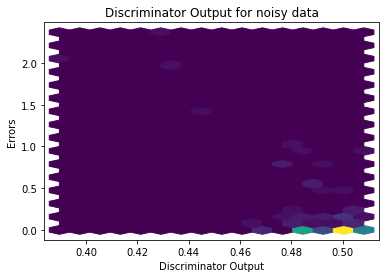

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6382]], requires_grad=True)
